## Steps
1. Understanding the data
2. EDA
3. Preparing the data (missing values/correct types)
4. Models building
5. Fine Tuning

<br>

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1. Understanding the data

In [33]:
train = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
test = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')

In [34]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
train.shape

(614, 13)

In [36]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## 2. EDA

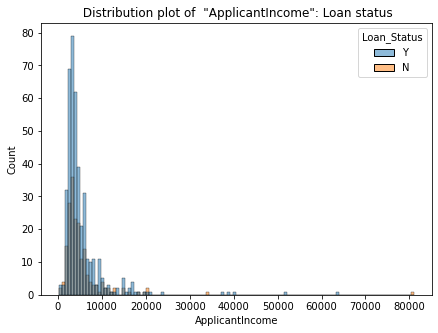

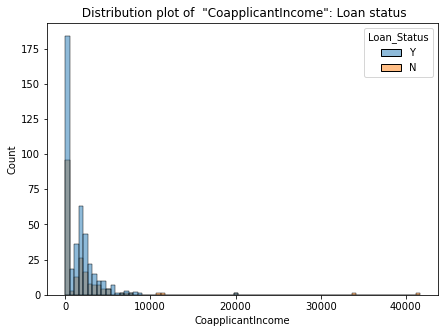

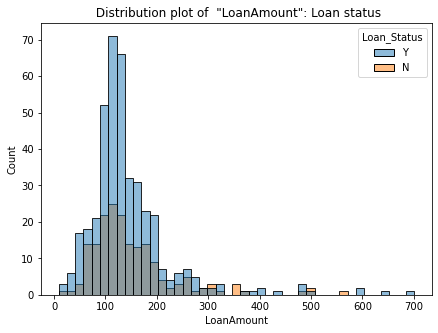

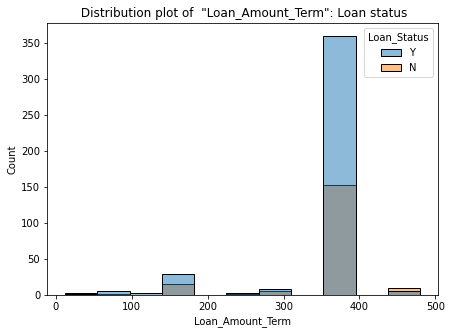

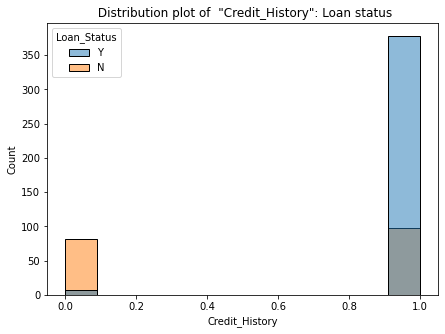

In [37]:
numericals = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in numericals:
    plt.figure(figsize=(7,5))
    sns.histplot(data=train,x=col,hue='Loan_Status')
    plt.title(' Distribution plot of  "'+col+'": Loan status')
    plt.show()

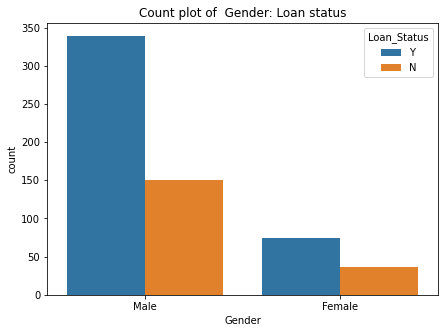

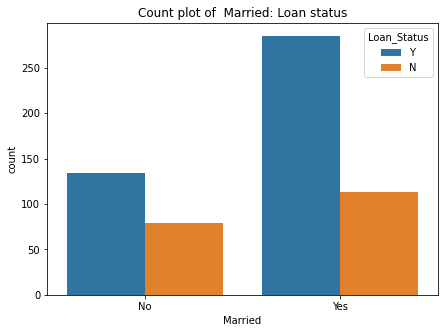

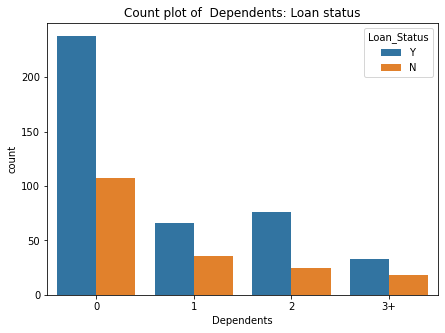

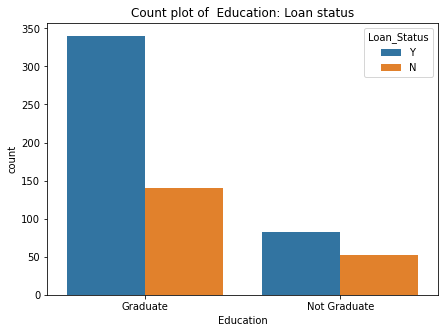

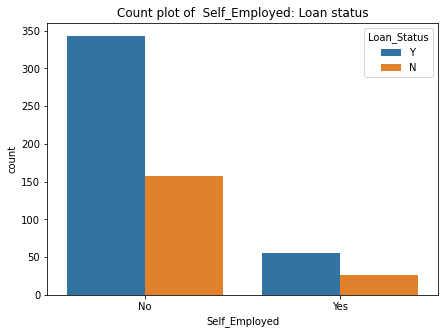

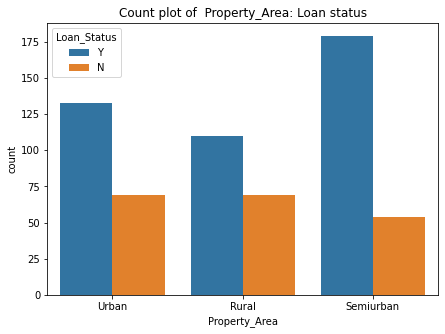

In [38]:
categories = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

for col in categories:
    plt.figure(figsize=(7,5))
    sns.countplot(data=train,x=col,hue='Loan_Status')
    plt.title('Count plot of  '+col+': Loan status')
    plt.show()

## 3. Preparing the data (missing values/types)

In [39]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
train = train.dropna()

In [41]:
print(f'Missing values in train dataframe : {train.isnull().sum().sum()}\n')
for column in range (0,len(train.columns)):
    print(train.columns[column], " n unique values : ", train[train.columns[column]].nunique())

Missing values in train dataframe : 0

Loan_ID  n unique values :  480
Gender  n unique values :  2
Married  n unique values :  2
Dependents  n unique values :  4
Education  n unique values :  2
Self_Employed  n unique values :  2
ApplicantIncome  n unique values :  405
CoapplicantIncome  n unique values :  232
LoanAmount  n unique values :  186
Loan_Amount_Term  n unique values :  9
Credit_History  n unique values :  2
Property_Area  n unique values :  3
Loan_Status  n unique values :  2


### Modifying types to numerical values

In [42]:
train = train.drop(['Loan_ID'], axis=1)
train['Gender'] = (train['Gender'].replace("Male", 1).replace("Female", 0))
train['Married'] = (train['Married'].replace("Yes", 1).replace("No", 0))
train['Dependents'] = (train['Dependents'].replace("0", 0).replace("1", 1).replace("2", 2).replace("3+", 3))
train['Self_Employed'] = (train['Self_Employed'].replace("Yes", 1).replace("No", 0))
train['Education'] = (train['Education'].replace("Graduate", 1).replace("Not Graduate", 0))
train['Loan_Status'] = (train['Loan_Status'].replace("Y", 1).replace("N", 0))

#Hot encoding categorical values (more than 2 categories)
train = pd.get_dummies(train, prefix=['Property_Area'])

In [43]:
train.dtypes

Gender                       int64
Married                      int64
Dependents                   int64
Education                    int64
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

### Correlation heatmap with all the data that is now numerical

Text(0.5, 1.0, 'Correlation Heatmap')

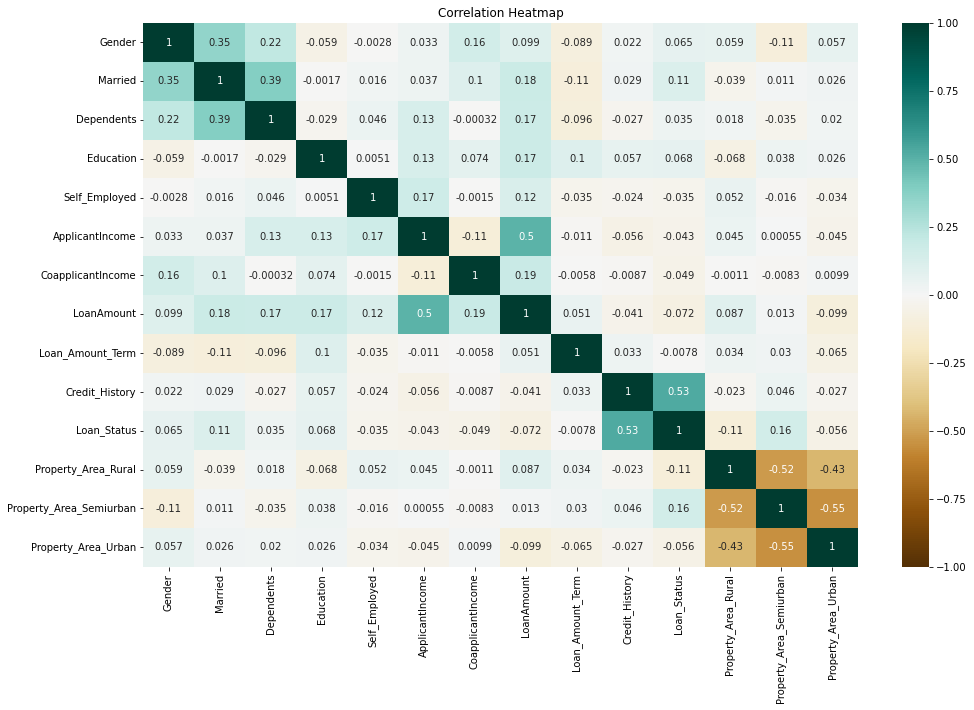

In [45]:
plt.subplots(figsize=(16, 10))
hm = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
hm.set_title('Correlation Heatmap')

## 4. Models building
### Evaluation Metrics for classification problem :
- Score accuracy
- Confusion matrix

### Splitting into train & validation sets

In [46]:
y = train['Loan_Status']
X = train.drop(['Loan_Status'],axis=1)
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=5)

### Model 1 : Logistic regression

In [47]:
logReg = LogisticRegression()
logReg.fit(x_train,y_train)
logReg_pred = logReg.predict(x_validation)
score = logReg.score(x_validation, y_validation)
print(f'Accuracy : {score*100:.2f} %')

Accuracy : 78.12 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


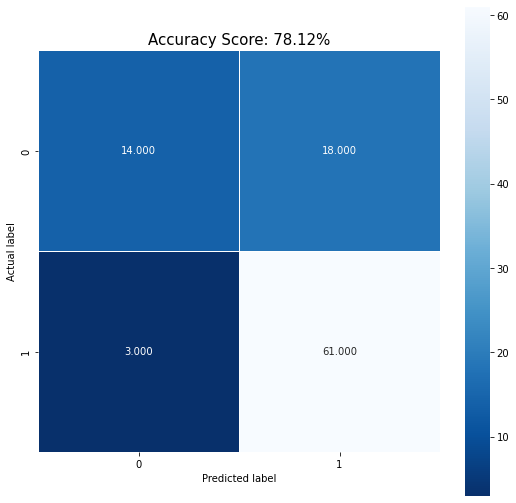

In [48]:
cm = metrics.confusion_matrix(y_validation, logReg_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {score*100:.2f}%'
plt.title(all_sample_title, size = 15);

### Model 2 : Random Forest Classification

In [49]:
clf=RandomForestClassifier(n_estimators=200,max_depth=10,)
clf.fit(x_train,y_train)
clf_pred = clf.predict(x_validation)
score = clf.score(x_validation, y_validation)
print(f'Accuracy : {score*100:.2f} %')

Accuracy : 77.08 %


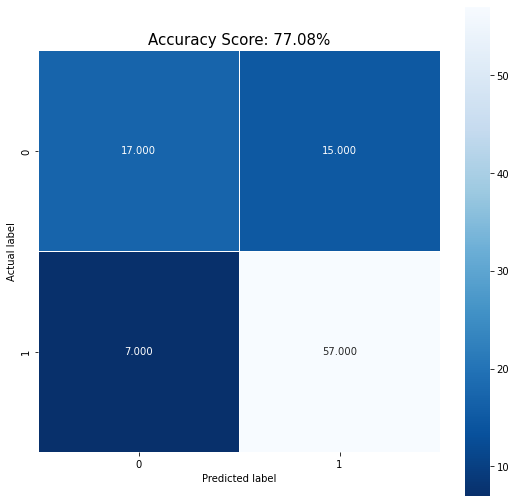

In [50]:
cm = metrics.confusion_matrix(y_validation, clf_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score*100:.2f}%'
plt.title(all_sample_title, size = 15)

### Model 3 : XGBClassifier

In [64]:
xgb_cl = XGBClassifier(learning_rate=0.007, n_estimators=200)
xgb_cl.fit(x_train, y_train)
xgb_cl_pred = xgb_cl.predict(x_validation)
score = xgb_cl.score(x_validation, y_validation)
print(f'Accuracy : {score*100:.2f} %')

Accuracy : 78.12 %


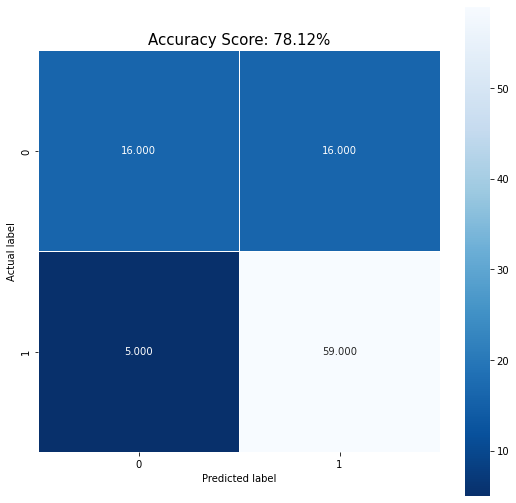

In [65]:
cm = metrics.confusion_matrix(y_validation, xgb_cl_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score*100:.2f}%'
plt.title(all_sample_title, size = 15)

## 5. Fine Tuning
### Trying to find best parameters for XGBClassifier

#### n_estimators

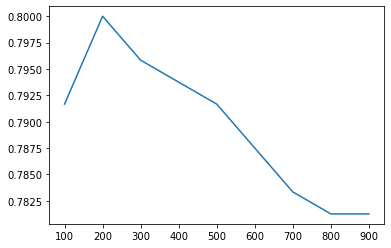

In [67]:
def scoring_estimators(n_estimators):
    xgb_cl = XGBClassifier(learning_rate=0.007, n_estimators=n_estimators)
    scores = cross_val_score(xgb_cl, X, y, cv=5)
    return scores.mean()
results = {}

for j in range(100, 1000, 100):
    results[j] = scoring_estimators(j).mean()
    
plt.plot(list(results.keys()), list(results.values()))
plt.show()

#### Learning rate

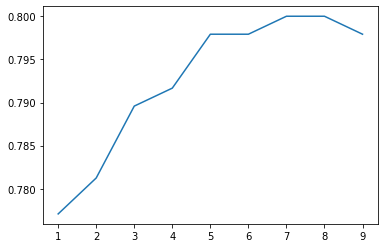

In [66]:
def scoring_lr(learning_rate):
    xgb_cl = XGBClassifier(learning_rate=learning_rate/1000, n_estimators=200)
    scores = cross_val_score(xgb_cl, X, y, cv=5)
    return scores.mean()
results = {}

for j in range(1, 10, 1):
    results[j] = scoring_lr(j).mean()
    
plt.plot(list(results.keys()), list(results.values()))
plt.show()

- n_estimators = 200
- learning rate = 0.007